In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from PIL import Image
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from IPython.display import Image

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("thing_mush/"))

['test_set', 'train_set']


In [36]:
# Initialising the CNN
model = Sequential()

# Step 1 - Convolution
model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
model.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a third convolutional layer
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a fourth convolutional layer
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
model.add(Flatten())

# Step 4 - Full connection
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

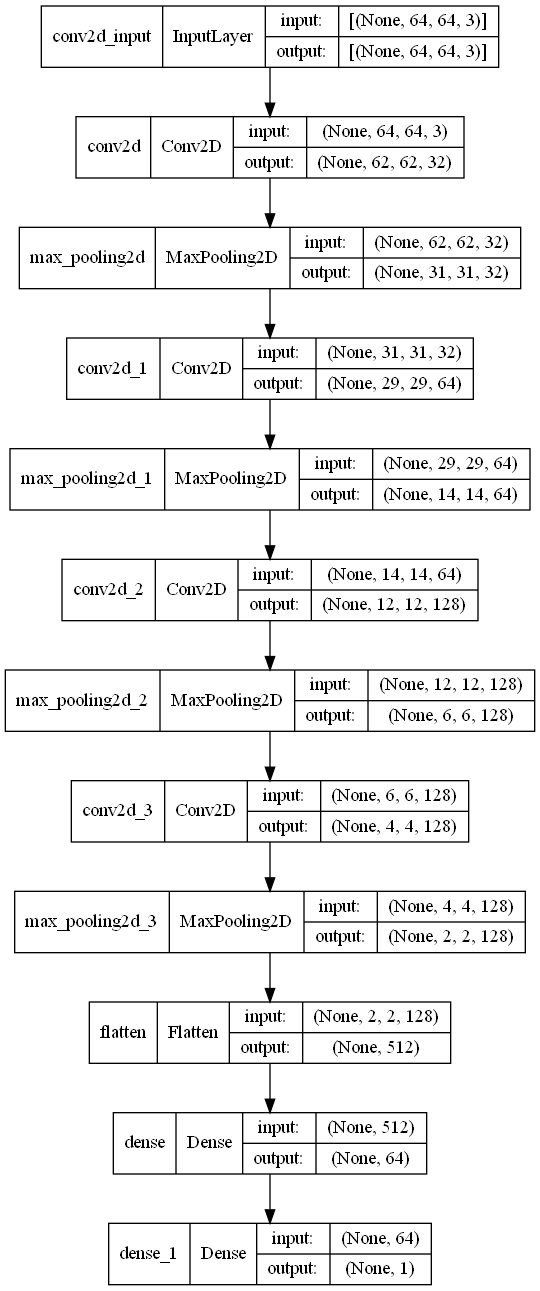

In [37]:
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)
display(Image.open('cnn_model.png'))

In [39]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('thing_mush/train_set/train_set/',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('thing_mush/test_set/test_set/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1278 images belonging to 2 classes.
Found 320 images belonging to 2 classes.


In [47]:
filepath = "best_model.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = model.fit_generator(training_set,
                         steps_per_epoch = 30,
                         epochs = 15,
                         validation_data = test_set,
                         validation_steps = 10,
                         callbacks = [checkpoint])
print(history.history.keys())

C:\Users\user\AppData\Local\Temp\ipykernel_3240\3886859345.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(training_set,


Epoch 1/15
30/30 [==============================] - 27s 922ms/step - loss: 0.0285 - accuracy: 0.9916 - val_loss: 0.0043 - val_accuracy: 0.9969
Epoch 2/15
30/30 [==============================] - 27s 907ms/step - loss: 0.0075 - accuracy: 0.9979 - val_loss: 0.0307 - val_accuracy: 0.9812
Epoch 3/15
30/30 [==============================] - 27s 912ms/step - loss: 4.2284e-04 - accuracy: 1.0000 - val_loss: 0.0078 - val_accuracy: 0.9969
Epoch 4/15
30/30 [==============================] - 27s 916ms/step - loss: 2.5867e-04 - accuracy: 1.0000 - val_loss: 0.0089 - val_accuracy: 0.9969
Epoch 5/15
30/30 [==============================] - 27s 915ms/step - loss: 1.7132e-04 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 0.9969
Epoch 6/15
30/30 [==============================] - 27s 906ms/step - loss: 4.2010e-04 - accuracy: 1.0000 - val_loss: 0.0154 - val_accuracy: 0.9969
Epoch 7/15
30/30 [==============================] - 28s 937ms/step - loss: 1.5501e-04 - accuracy: 1.0000 - val_loss: 0.0130 - 

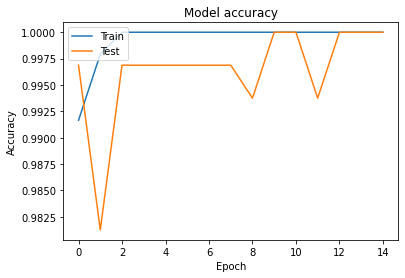

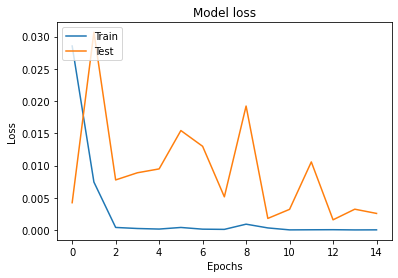

In [48]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

[[1.]]
{'mushrooms': 0, 'things': 1}
mushroom


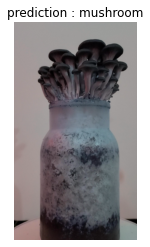

In [74]:
import numpy as np
from keras.preprocessing import image
filename = 'thing_mush/test_set/test_set/mushrooms/mushroom.14.jpg'
test_image = image.load_img(filename, target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

print(result)
print(training_set.class_indices)

if result[0][0] == 1:
    prediction = 'mushroom'
else:
    prediction = 'thing'
print(prediction)

image = cv2.imread(filename)
image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title(f'prediction : {prediction}')
plt.axis('off')

plt.show()